In [15]:
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
conn = sqlite3.connect('twitch.db')

In [17]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


In [20]:
twitch_data['Date'] = pd.to_datetime(twitch_data['Date'])
new_week = twitch_data[twitch_data["Date"] == '2022-02-06']
new_week

,index,Date,Time,Directory Name,Viewer Count
60,0,2022-02-06,10:45:59,Just Chatting,615651
61,1,2022-02-06,10:45:59,League of Legends,322372
62,2,2022-02-06,10:45:59,Counter-Strike: Global Offensive,231569
63,3,2022-02-06,10:45:59,Grand Theft Auto V,207003
64,4,2022-02-06,10:45:59,Sifu,163422
65,5,2022-02-06,10:45:59,Dying Light 2: Stay Human,138057
66,6,2022-02-06,10:45:59,VALORANT,134179
67,7,2022-02-06,10:45:59,Fortnite,132689
68,8,2022-02-06,10:45:59,Rust,93673
69,9,2022-02-06,10:45:59,Dota 2,81970


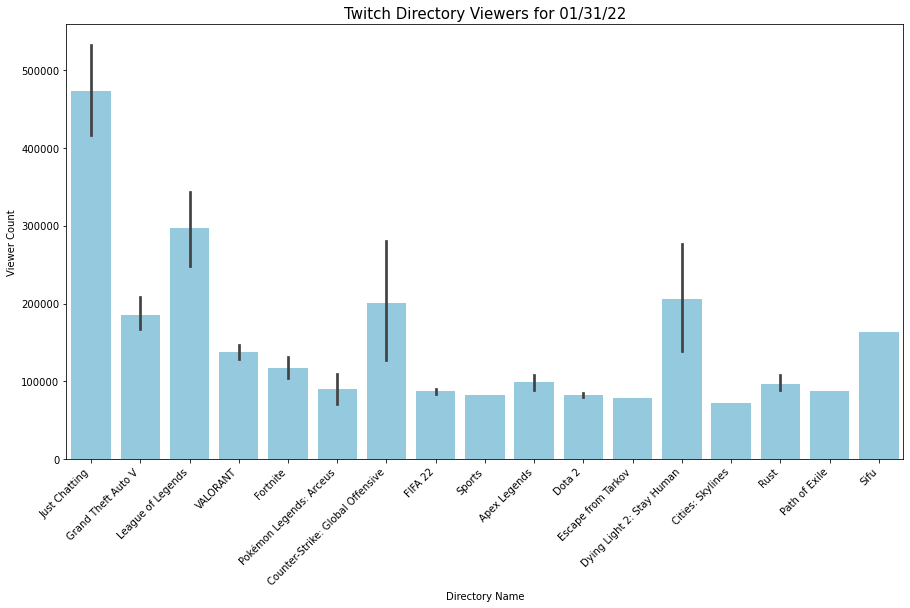

In [4]:
plt.figure(figsize=(15,8))
sns.barplot(x= twitch_data['Directory Name'], y=twitch_data['Viewer Count'], color='skyblue')
plt.xticks(rotation=45,ha='right')
plt.title('Twitch Directory Viewers for 01/31/22', fontsize=15)
plt.show()

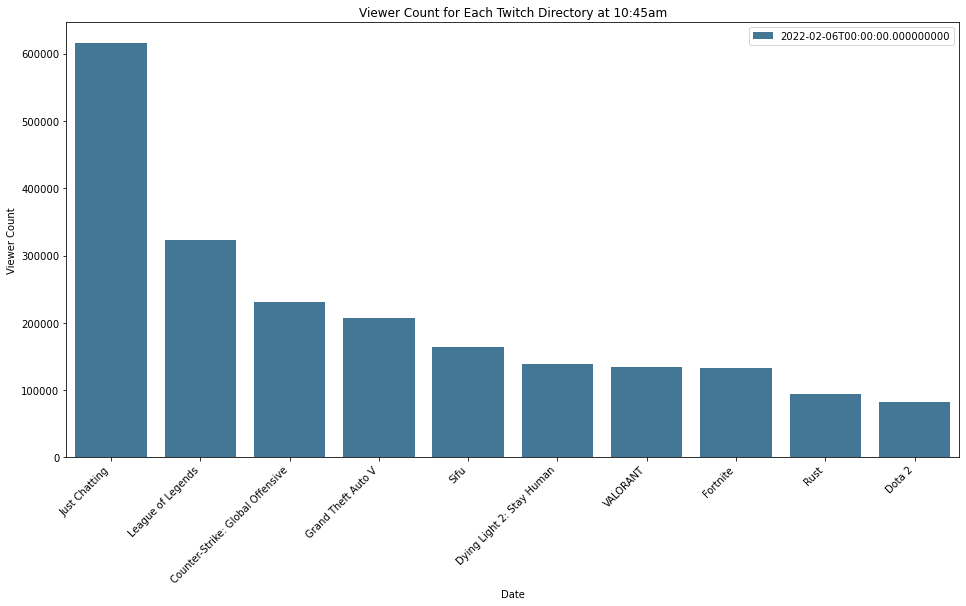

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x= new_week['Directory Name'], y=new_week['Viewer Count'], hue=new_week['Date'], palette='mako', ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Viewer Count for Each Twitch Directory at 10:45am')
plt.xlabel('Date')
plt.ylabel('Viewer Count')
plt.legend(loc=('upper right'))
plt.show()

In [6]:
twitch_data['Date'] = pd.to_datetime(twitch_data['Date'])

In [7]:
max_group = twitch_data.groupby(['Directory Name']).resample('W-Sun', on='Date').max()
max_group.drop(columns=['Date', 'Directory Name']).reset_index()
mean_group = twitch_data.groupby(['Directory Name']).resample('W-Sun', on='Date').mean()
#mean_group.drop(columns=['Date', 'Directory Name']).reset_index()

In [8]:
mean_group.reset_index(inplace=True)

In [26]:
mean_group = new_week.groupby(['Directory Name']).mean().reset_index()
max_group = new_week.groupby(['Directory Name']).max().reset_index()

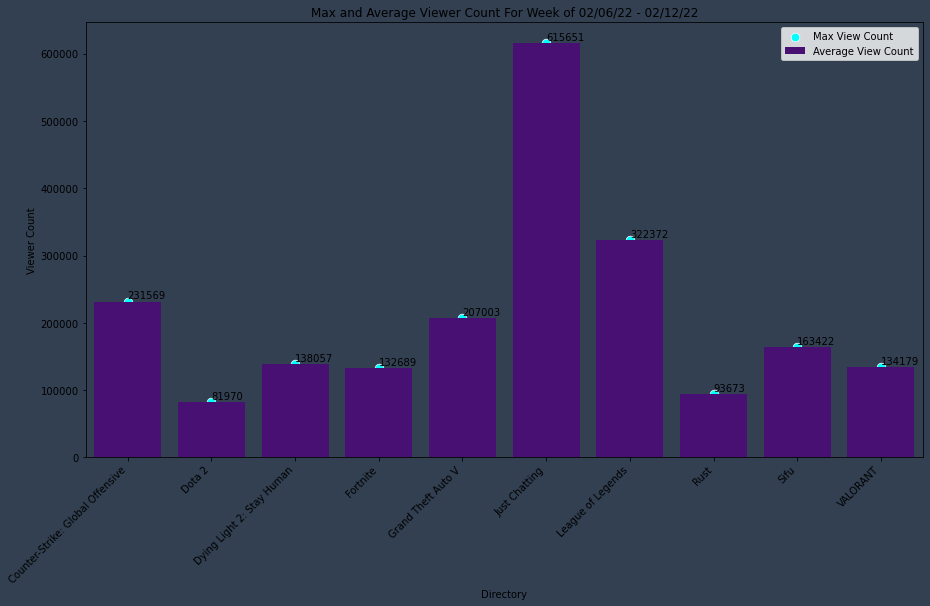

In [31]:
fig = plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=max_group['Directory Name'], y=max_group['Viewer Count'] , color='aqua',s=75,label='Max View Count')
sns.barplot(x=mean_group['Directory Name'], y=mean_group['Viewer Count'], color='indigo', label = 'Average View Count')
plt.xticks(rotation=45,ha='right')
a = pd.concat({'x': max_group['Directory Name'], 'y': max_group['Viewer Count'], 'val': max_group['Viewer Count']}, axis=1)
for i, point in a.iterrows():
    ax.text(point['x'], point['y']+4500, str(point['val']))

plt.title('Max and Average Viewer Count For Week of 02/06/22 - 02/12/22')
plt.xlabel('Directory')
plt.ylabel('Viewer Count')
ax.set_facecolor('#324052')
fig.set_facecolor('#324052')
plt.legend(loc=('upper right'))
plt.show()